In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
try:
    fraud_data = pd.read_csv('../data/raw/Fraud_Data.csv')
    ip_to_country = pd.read_csv('../data/raw/IpAddress_to_Country.csv')
    creditcard_data = pd.read_csv('../data/raw/creditcard.csv')
    print("Datasets loaded successfully!")
except FileNotFoundError as e:
    print(f"Error loading file: {e}. Make sure the CSV files are in the 'data/raw/' directory.")

# Display the first few rows of each DataFrame
print("\n--- Fraud_Data.csv ---")
print(fraud_data.head())
print("\n--- IpAddress_to_Country.csv ---")
print(ip_to_country.head())
print("\n--- creditcard.csv ---")
print(creditcard_data.head())

# Get information about each DataFrame
print("\n--- Fraud_Data.csv Info ---")
fraud_data.info()
print("\n--- IpAddress_to_Country.csv Info ---")
ip_to_country.info()
print("\n--- creditcard.csv Info ---")
creditcard_data.info()

# Get descriptive statistics
print("\n--- Fraud_Data.csv Description ---")
print(fraud_data.describe(include='all'))
print("\n--- creditcard.csv Description ---")
print(creditcard_data.describe())

Datasets loaded successfully!

--- Fraud_Data.csv ---
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  

--- IpAddress_to_Country.csv ---
   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0         

# Data cleaning and type conversion 

In [ ]:
# --- Fraud_Data.csv Cleaning ---
print("\n--- Fraud_Data.csv Missing Values ---")
print(fraud_data.isnull().sum())

print("\nUnique values in 'sex' (Fraud_Data):", fraud_data['sex'].unique())

# Impute missing 'sex' values with the mode
if fraud_data['sex'].isnull().any():
    mode_sex = fraud_data['sex'].mode()[0]
    fraud_data['sex'].fillna(mode_sex, inplace=True)
    print(f"Missing 'sex' values imputed with mode: {mode_sex}")

if fraud_data['age'].isnull().any():
    median_age = fraud_data['age'].median()
    fraud_data['age'].fillna(median_age, inplace=True)
    print(f"Missing 'age' values imputed with median: {median_age}")

fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
print("\n'signup_time' and 'purchase_time' converted to datetime.")
fraud_data.info()

initial_rows_fraud = fraud_data.shape[0]
fraud_data.drop_duplicates(subset=['user_id', 'device_id', 'purchase_time', 'purchase_value'], inplace=True)
rows_after_dedup_fraud = fraud_data.shape[0]
print(f"\nFraud_Data.csv: Removed {initial_rows_fraud - rows_after_dedup_fraud} duplicate rows.")


# --- creditcard.csv Cleaning ---
print("\n--- creditcard.csv Missing Values ---")
print(creditcard_data.isnull().sum())

initial_rows_creditcard = creditcard_data.shape[0]
creditcard_data.drop_duplicates(subset=[col for col in creditcard_data.columns if col != 'Class'], inplace=True)
rows_after_dedup_creditcard = creditcard_data.shape[0]
print(f"\ncreditcard.csv: Removed {initial_rows_creditcard - rows_after_dedup_creditcard} duplicate rows.")

print("\nData cleaning and type conversion complete for both datasets.")


--- Fraud_Data.csv Missing Values ---
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Unique values in 'sex' (Fraud_Data): ['M' 'F']

'signup_time' and 'purchase_time' converted to datetime.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-nu

# Fraud_Data.csv Univariate Analysis


--- Fraud_Data.csv Univariate Analysis ---


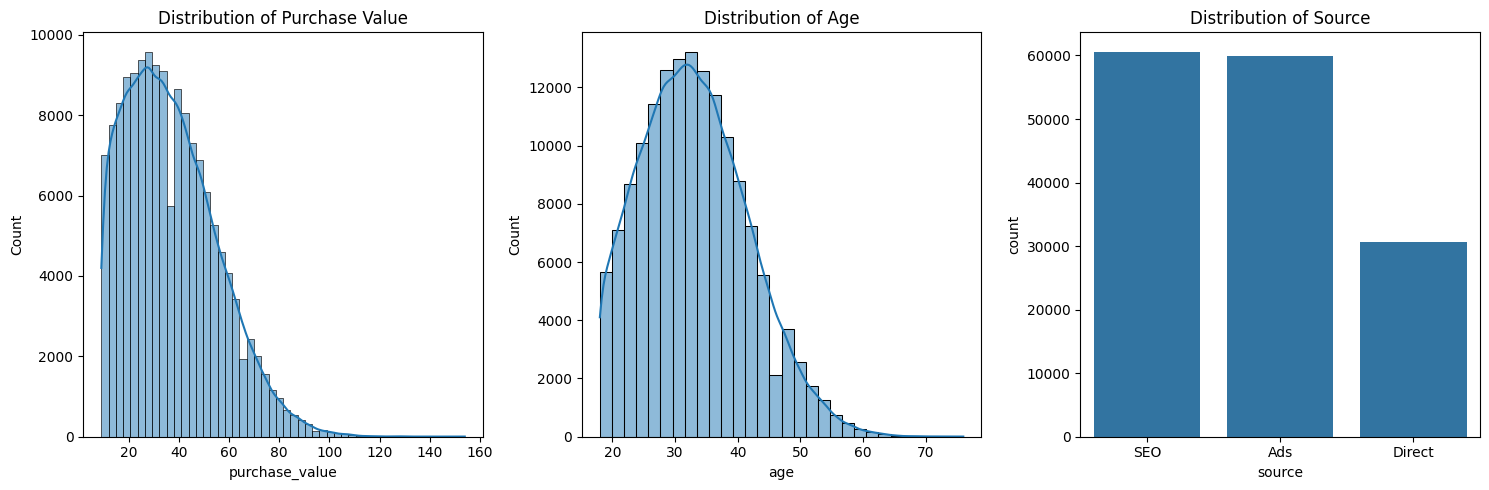

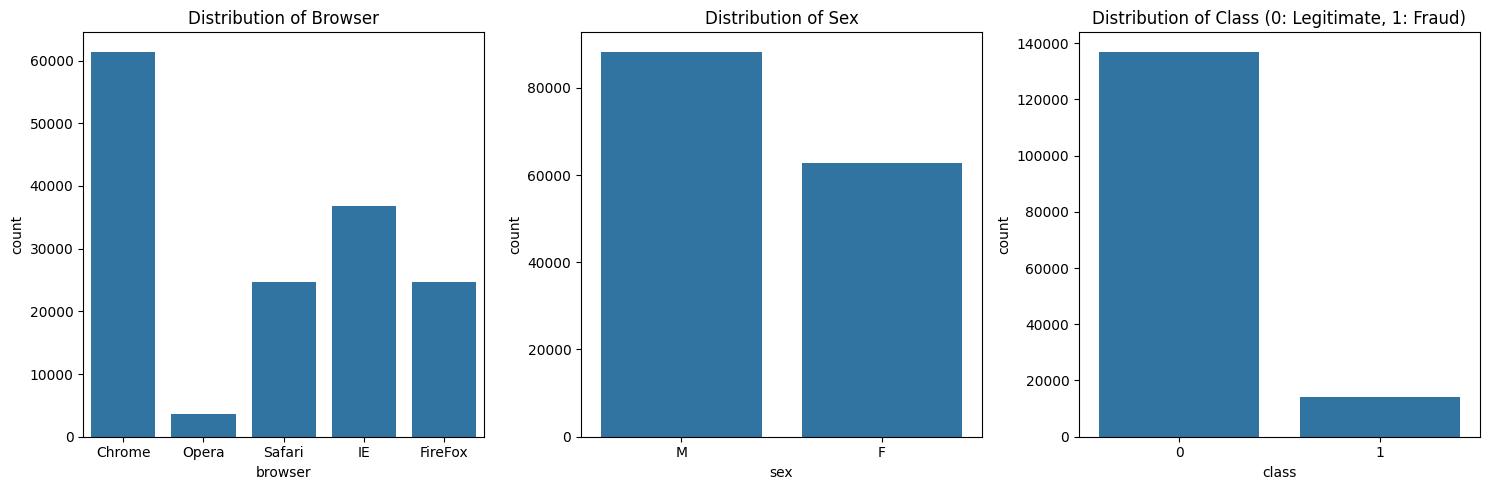


--- creditcard.csv Univariate Analysis ---


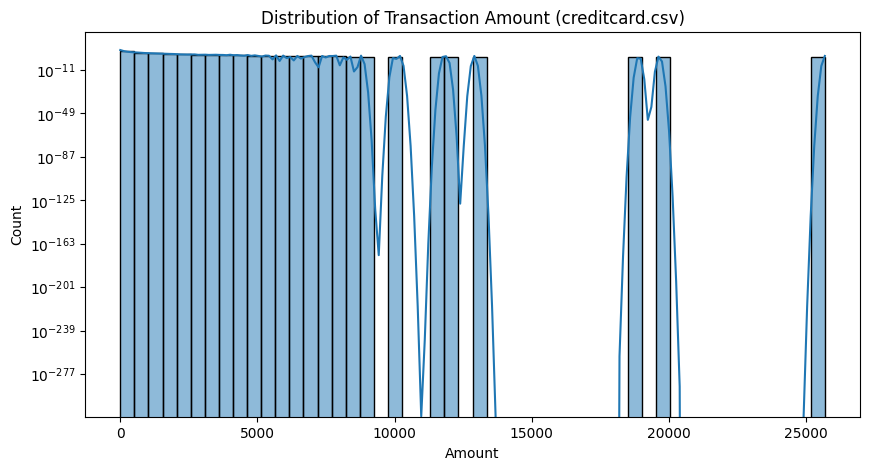

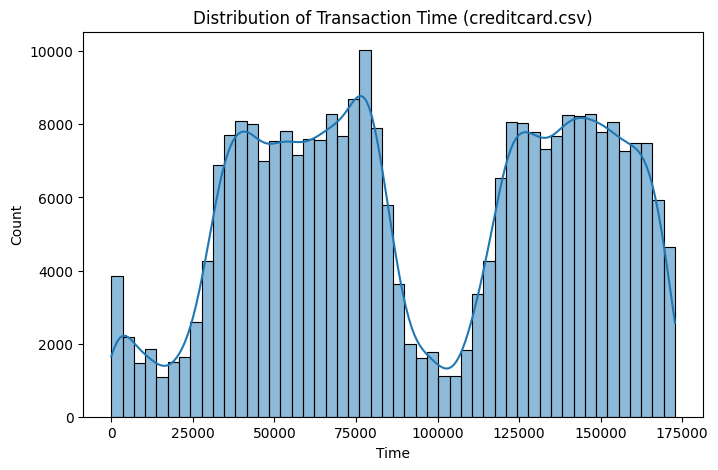

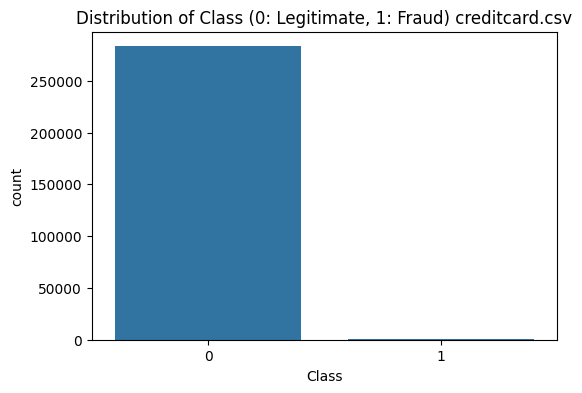

In [ ]:
print("\n--- Fraud_Data.csv Univariate Analysis ---")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(fraud_data['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Value')

plt.subplot(1, 3, 2)
sns.histplot(fraud_data['age'], bins=30, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 3)
sns.countplot(x='source', data=fraud_data)
plt.title('Distribution of Source')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='browser', data=fraud_data)
plt.title('Distribution of Browser')

plt.subplot(1, 3, 2)
sns.countplot(x='sex', data=fraud_data)
plt.title('Distribution of Sex')

plt.subplot(1, 3, 3)
sns.countplot(x='class', data=fraud_data)
plt.title('Distribution of Class (0: Legitimate, 1: Fraud)')
plt.tight_layout()
plt.show()

# --- creditcard.csv Univariate Analysis ---
print("\n--- creditcard.csv Univariate Analysis ---")

plt.figure(figsize=(10, 5))
sns.histplot(creditcard_data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount (creditcard.csv)')
plt.yscale('log') 
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(creditcard_data['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time (creditcard.csv)')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=creditcard_data)
plt.title('Distribution of Class (0: Legitimate, 1: Fraud) creditcard.csv')
plt.show()

# Fraud_Data.csv Bivariate Analysis 


--- Fraud_Data.csv Bivariate Analysis ---


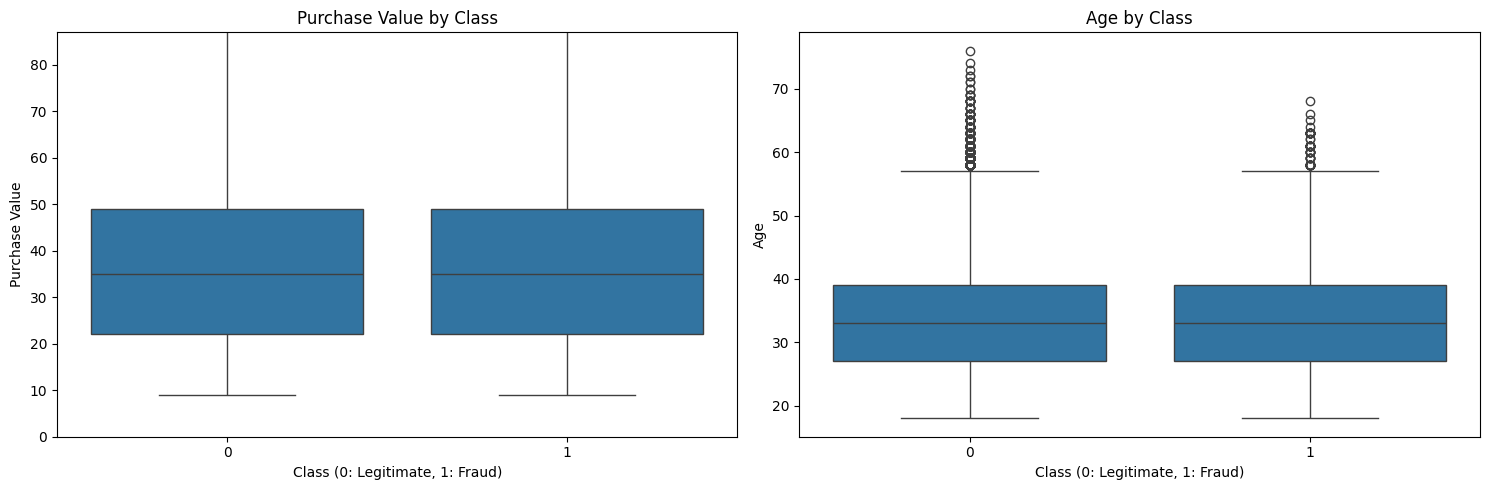

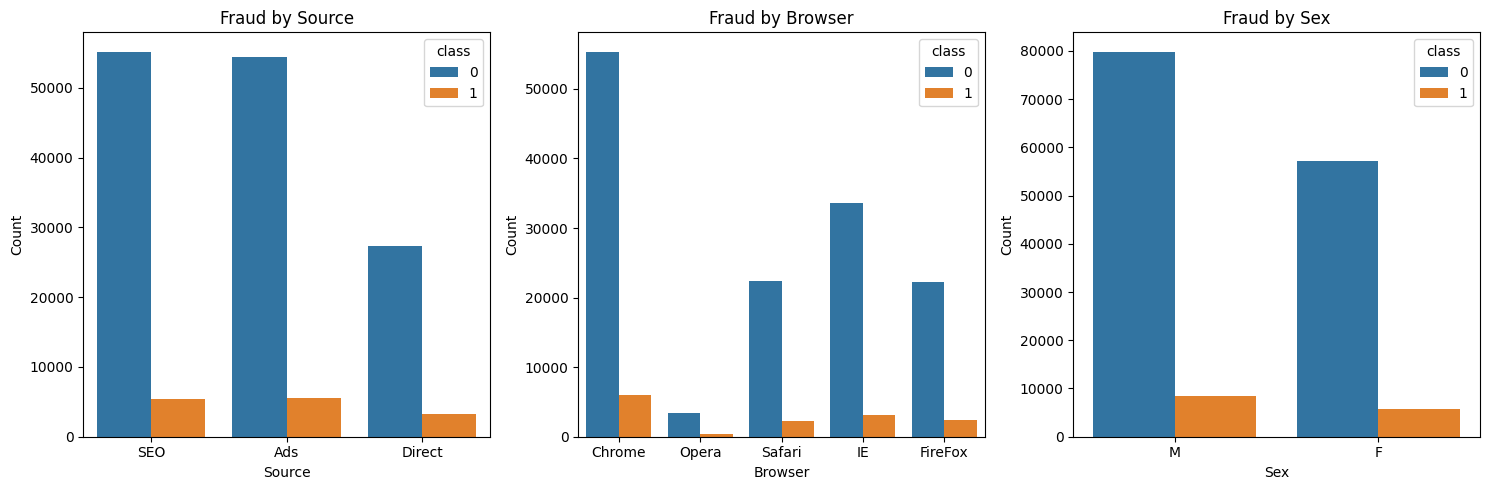


--- creditcard.csv Bivariate Analysis ---


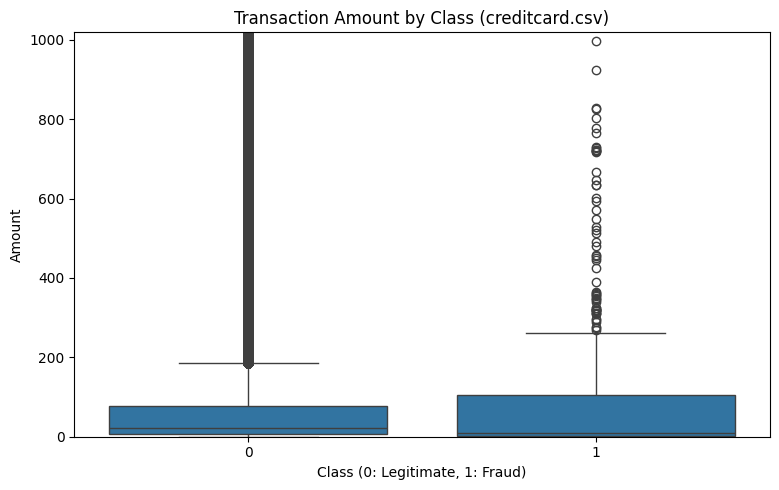

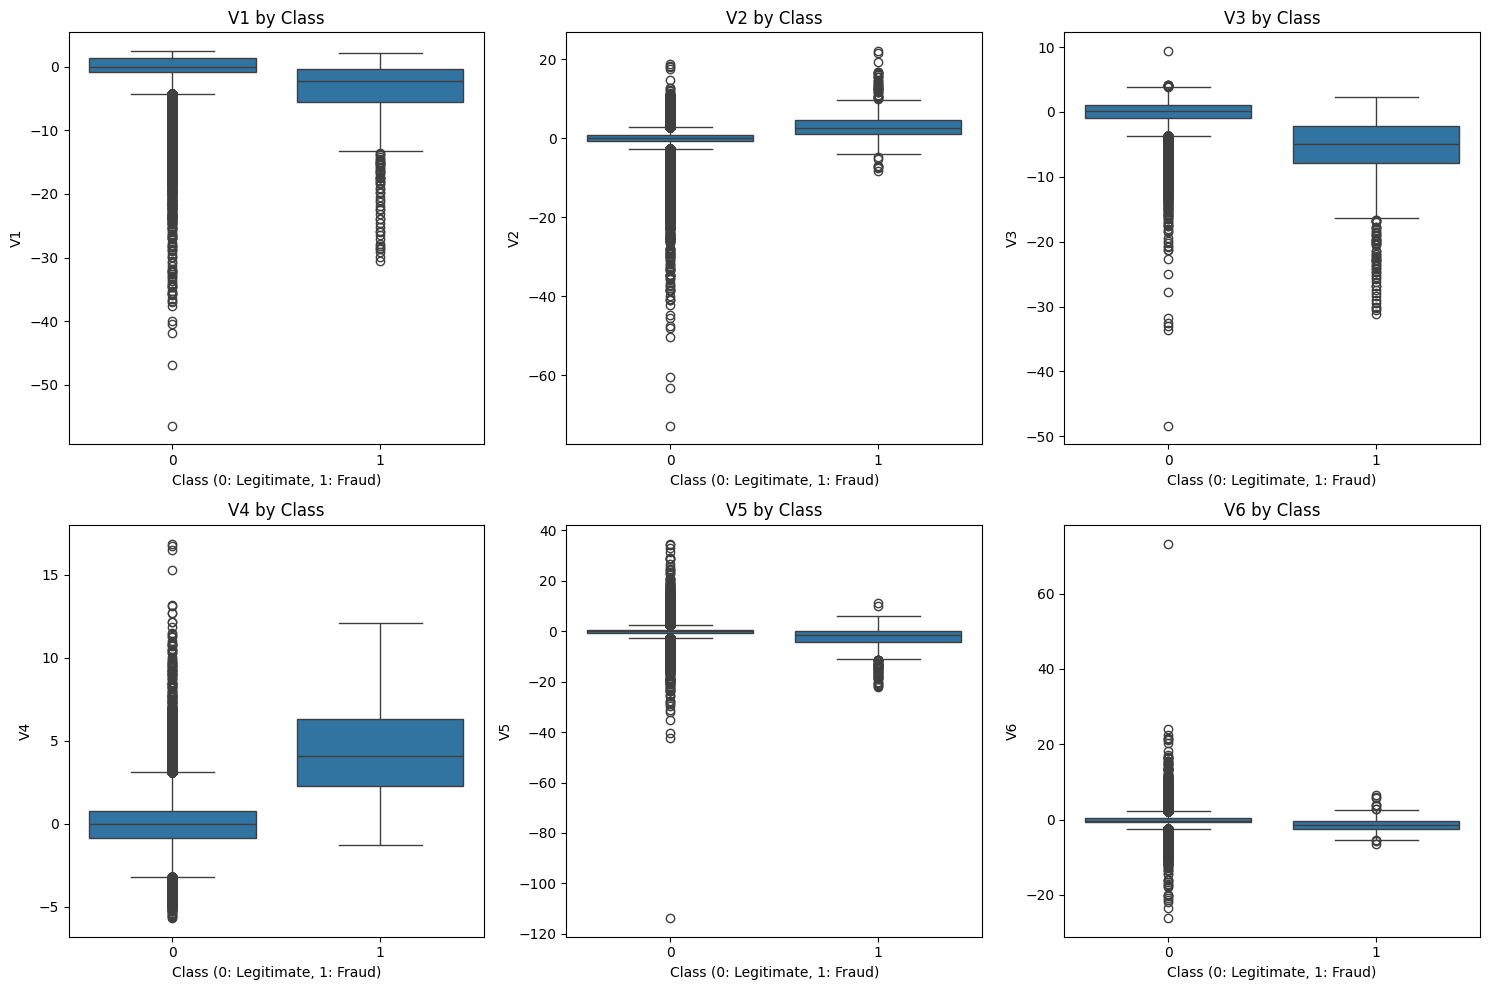


EDA complete. We have observed class imbalance and potential relationships between features and the target variable.


In [ ]:
print("\n--- Fraud_Data.csv Bivariate Analysis ---")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value by Class')
plt.ylim(0, fraud_data['purchase_value'].quantile(0.99)) # Limit y-axis to focus on main distribution
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Purchase Value')

plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='age', data=fraud_data)
plt.title('Age by Class')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='source', hue='class', data=fraud_data)
plt.title('Fraud by Source')
plt.xlabel('Source')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(x='browser', hue='class', data=fraud_data)
plt.title('Fraud by Browser')
plt.xlabel('Browser')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.countplot(x='sex', hue='class', data=fraud_data)
plt.title('Fraud by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# --- creditcard.csv Bivariate Analysis ---
print("\n--- creditcard.csv Bivariate Analysis ---")

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=creditcard_data)
plt.title('Transaction Amount by Class (creditcard.csv)')
plt.ylim(0, creditcard_data['Amount'].quantile(0.99)) # Limit y-axis
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(['V1', 'V2', 'V3', 'V4', 'V5', 'V6']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Class', y=col, data=creditcard_data)
    plt.title(f'{col} by Class')
    plt.xlabel('Class (0: Legitimate, 1: Fraud)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("\nEDA complete. We have observed class imbalance and potential relationships between features and the target variable.")

# Geolocation analysis.



Converting IP addresses to integer format...
IP address conversion complete.
Merging Fraud_Data with IpAddress_to_Country...
Merge complete. Displaying first few rows with 'country' column:
         ip_address  ip_address_int         country  class
34321  2.494581e+09      2494581089  United Kingdom      0
57616  8.092637e+08       809263681   United States      0
46520  2.891497e+06         2891496         Unknown      0
69175  1.377849e+09      1377849233  United Kingdom      1
35860  1.377849e+09      1377849233  United Kingdom      1


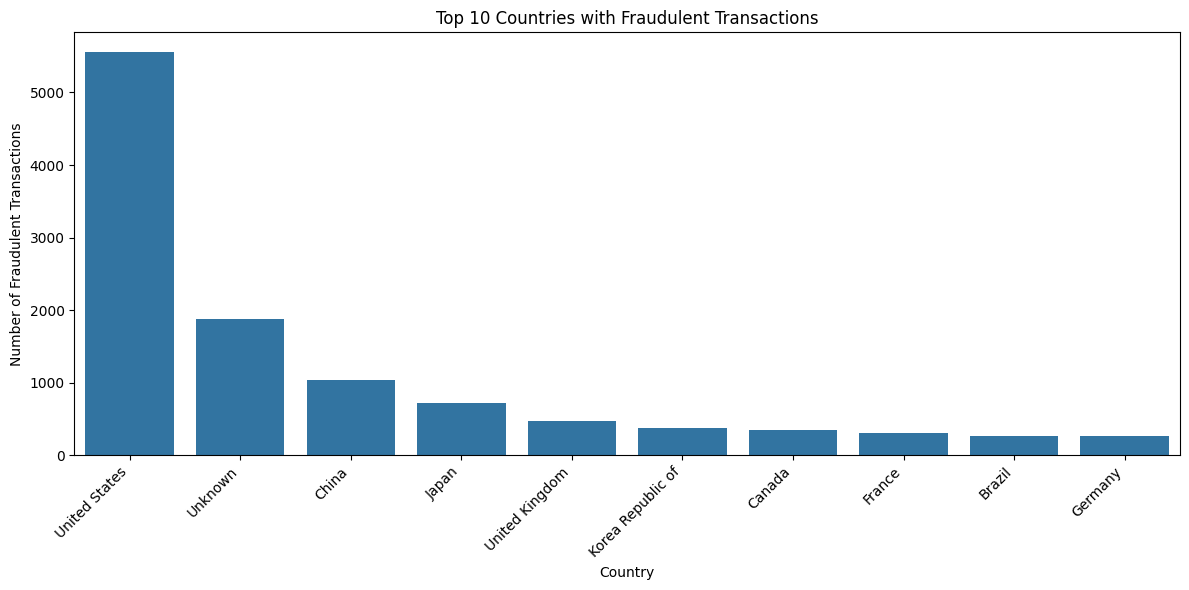


Geolocation analysis complete.


In [19]:

def ip_to_int(ip_address):
    if pd.isna(ip_address):
        return np.nan
    try:
        return int(float(ip_address))
    except (ValueError, TypeError):
        try:
            parts = str(ip_address).split('.')
            if len(parts) == 4:
                return int(parts[0]) * 256**3 + int(parts[1]) * 256**2 + int(parts[2]) * 256 + int(parts[3])
            else:
                return np.nan 
        except (ValueError, AttributeError):
            return np.nan 

print("\nConverting IP addresses to integer format...")
fraud_data['ip_address_int'] = fraud_data['ip_address'].apply(ip_to_int)
print("IP address conversion complete.")

ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].astype(int)
ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].astype(int)

ip_to_country_sorted = ip_to_country.sort_values(by='lower_bound_ip_address').reset_index(drop=True)

def get_country(ip_int, ip_country_df):
    if pd.isna(ip_int):
        return 'Unknown'

    idx = ip_country_df['lower_bound_ip_address'].searchsorted(ip_int, side='right') - 1
    if idx >= 0 and ip_int >= ip_country_df.loc[idx, 'lower_bound_ip_address'] and ip_int <= ip_country_df.loc[idx, 'upper_bound_ip_address']:
        return ip_country_df.loc[idx, 'country']
    return 'Unknown'

print("Merging Fraud_Data with IpAddress_to_Country...")
fraud_data['country'] = fraud_data['ip_address_int'].apply(lambda x: get_country(x, ip_to_country_sorted))
print("Merge complete. Displaying first few rows with 'country' column:")
print(fraud_data[['ip_address', 'ip_address_int', 'country', 'class']].head())

# Analyze countries of fraudulent transactions
plt.figure(figsize=(12, 6))
fraud_countries = fraud_data[fraud_data['class'] == 1]['country'].value_counts().head(10)

if not fraud_countries.empty:
    sns.barplot(x=fraud_countries.index, y=fraud_countries.values)
    plt.title('Top 10 Countries with Fraudulent Transactions')
    plt.xlabel('Country')
    plt.ylabel('Number of Fraudulent Transactions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('top_10_fraud_countries.png') 
    plt.show() 
else:
    print("No fraudulent transactions found to plot country distribution.")

print("\nGeolocation analysis complete.")

# Feature engineering for Fraud_Data.csv.



'transactions_per_device' and 'transactions_per_ip' created.
First few rows with new frequency features:
           device_id  transactions_per_device    ip_address  \
34321  AAALBGNHHVMKG                        1  2.494581e+09   
57616  AAAWIHVCQELTP                        1  8.092637e+08   
46520  AAAXJHWCLISKY                        1  2.891497e+06   
69175  AAAXXOZJRZRAO                       11  1.377849e+09   
35860  AAAXXOZJRZRAO                       11  1.377849e+09   

       transactions_per_ip  class  
34321                    1      0  
57616                    1      0  
46520                    1      0  
69175                   11      1  
35860                   11      1  


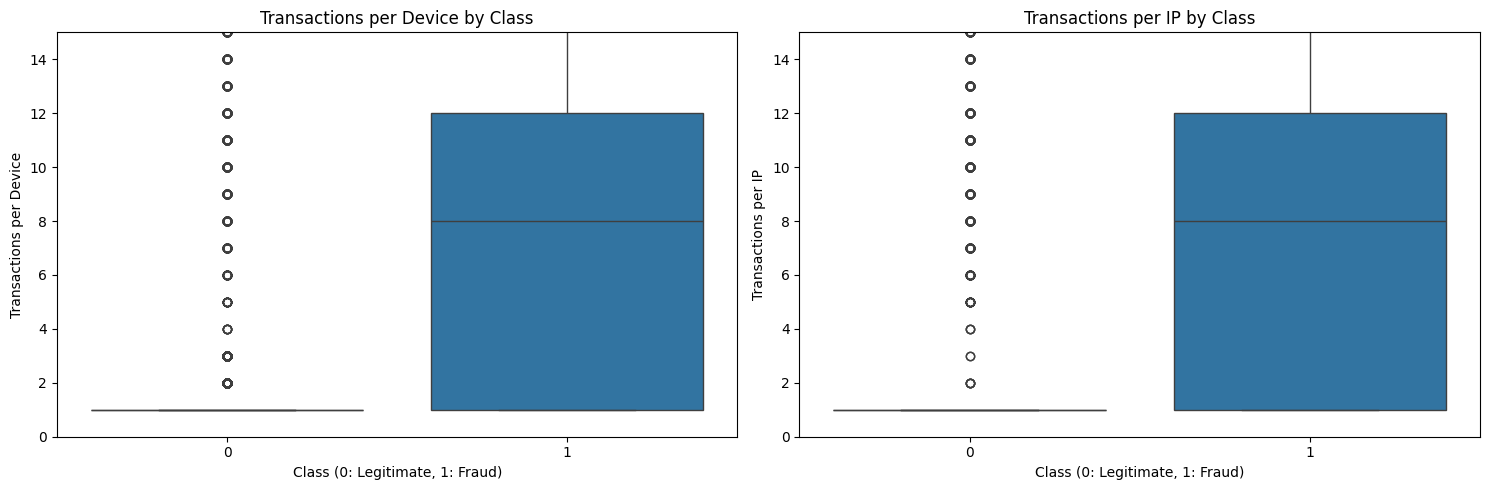


Feature engineering complete for Fraud_Data.csv.


In [ ]:

fraud_data_sorted = fraud_data.sort_values(by=['device_id', 'purchase_time'])

device_transactions = fraud_data_sorted.groupby('device_id')['user_id'].transform('count')
fraud_data_sorted['transactions_per_device'] = device_transactions

ip_transactions = fraud_data_sorted.groupby('ip_address_int')['user_id'].transform('count')
fraud_data_sorted['transactions_per_ip'] = ip_transactions

print("\n'transactions_per_device' and 'transactions_per_ip' created.")
print("First few rows with new frequency features:")
print(fraud_data_sorted[['device_id', 'transactions_per_device', 'ip_address', 'transactions_per_ip', 'class']].head())

fraud_data = fraud_data_sorted.copy()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='transactions_per_device', data=fraud_data)
plt.title('Transactions per Device by Class')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Transactions per Device')
plt.ylim(0, fraud_data['transactions_per_device'].quantile(0.99))
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='transactions_per_ip', data=fraud_data)
plt.title('Transactions per IP by Class')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Transactions per IP')
plt.ylim(0, fraud_data['transactions_per_ip'].quantile(0.99))
plt.tight_layout()
plt.show()

print("\nFeature engineering complete for Fraud_Data.csv.")

# --- Class Imbalance Analysis ---


--- Class Imbalance Analysis ---
Fraud_Data.csv Class Distribution:
class
0    136961
1     14151
Name: count, dtype: int64
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64

creditcard.csv Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


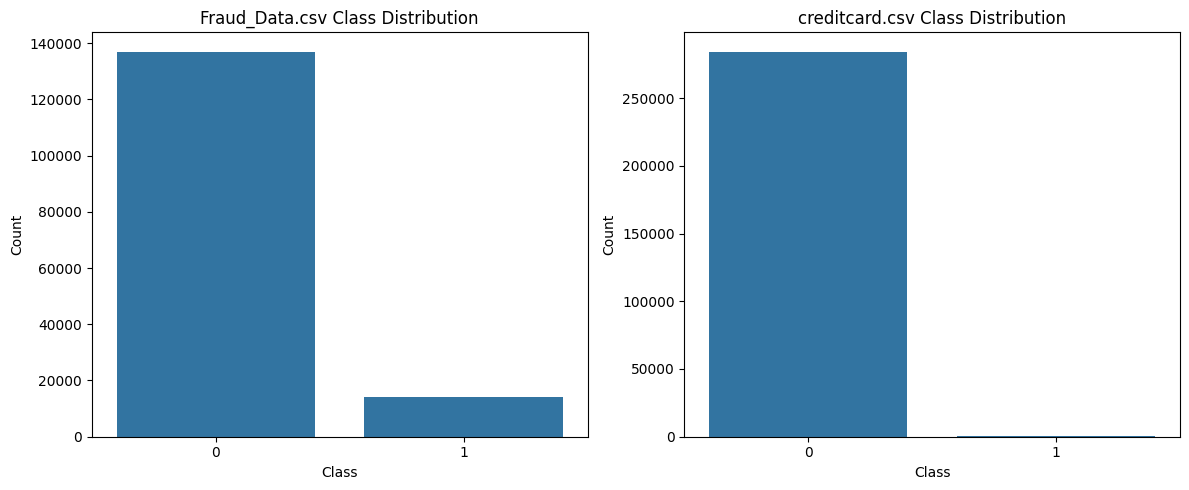


As expected, both datasets show significant class imbalance, with legitimate transactions far outnumbering fraudulent ones. This is a critical challenge.


In [18]:
print("\n--- Class Imbalance Analysis ---")
print("Fraud_Data.csv Class Distribution:")
print(fraud_data['class'].value_counts())
print(fraud_data['class'].value_counts(normalize=True) * 100)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='class', data=fraud_data)
plt.title('Fraud_Data.csv Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

print("\ncreditcard.csv Class Distribution:")
print(creditcard_data['Class'].value_counts())
print(creditcard_data['Class'].value_counts(normalize=True) * 100)

plt.subplot(1, 2, 2)
sns.countplot(x='Class', data=creditcard_data)
plt.title('creditcard.csv Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("\nAs expected, both datasets show significant class imbalance, with legitimate transactions far outnumbering fraudulent ones. This is a critical challenge.")